In [1]:
import lec
import xarray
import numpy as np

vmecOutput = "./../testField/wout_DIII-D.nc" 
surf = lec.Surface.readVMECOutput(vmecOutput)
iota = float(xarray.open_dataset(vmecOutput)["iotas"].values[-1])

In [2]:
eqDIIID = lec.SurfaceEquilibrium(surf=surf, iota=iota)
eqDIIID.run()

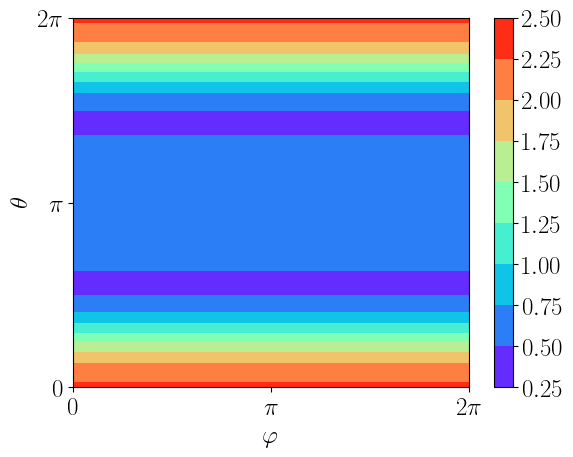

In [3]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
eqDIIID.Jacobian.plot_plt(ax=ax, fig=fig)

/mnt/f/Codes/LEC/lec/solver/problem.py:51: RuntimeWarning: invalid value encountered in power
  ctrig = ax.contourf(zetaGrid, thetaGrid, np.power(B2Grid,1/2), cmap=cm.rainbow)


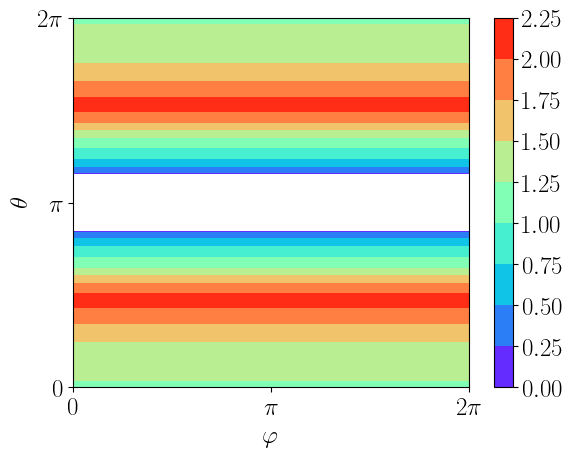

In [4]:
fig, ax = plt.subplots()
eqDIIID.plotB(ax=ax, fig=fig)